# import library

In [130]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os,sys


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

# import dataset

In [131]:
df = pd.read_csv('kidney_disease.csv')
df.head(n=10)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [132]:
df.shape

(400, 26)

In [133]:
#finding the null value in dataset
#can identify how many null value in ininclude columvice
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [134]:
#imputing null values
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [135]:
#check null value agin
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [136]:
#finding the quique values in the columna
#using loop
for i in df_imputed.columns:
    print("***************************************************",i,"***************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

*************************************************** id ***************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2

In [137]:
set(df_imputed["age"].tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

In [138]:
print(df_imputed["rc"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [139]:
df_imputed["classification"] = df_imputed["classification"].apply(lambda x: 'ckd' if x=="ckd\t" else x)

df_imputed["cad"] = df_imputed["cad"].apply(lambda x:'no' if x=="\tno" else x)

df_imputed["dm"] = df_imputed["dm"].apply(lambda x:'no' if x=="\tno" else x)
df_imputed["dm"] = df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes" else x)
df_imputed["dm"] = df_imputed["dm"].apply(lambda x:'yes' if x=='yes' else x)

df_imputed["rc"] = df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed["wc"] = df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200' else x)
df_imputed["wc"] = df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed["wc"] = df_imputed["wc"].apply(lambda x:'9800' if x=='\t?' else x)

df_imputed["pcv"] = df_imputed["pcv"].apply(lambda x:'41' if x=='\t43' else x)
df_imputed["pcv"] = df_imputed["pcv"].apply(lambda x:'41' if x=='\t?' else x)

In [140]:
#finding unique values in the column
for i in df_imputed.columns:
    print("***************************************************",i,"***************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

*************************************************** id ***************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2

AxesSubplot(0.125,0.11;0.775x0.77)


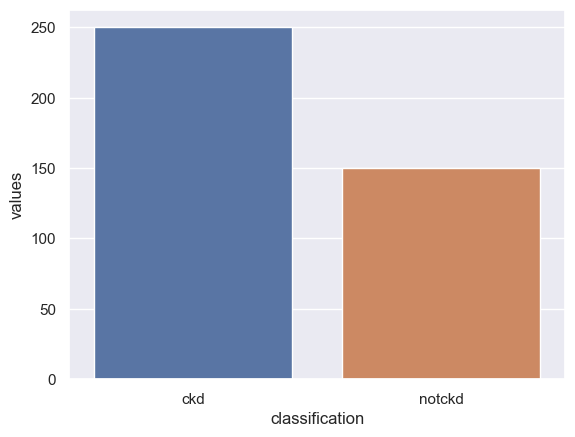

In [141]:
#check label Imbalance
import matplotlib.pyplot as plt
import seaborn as sns
temp = df_imputed["classification"].value_counts()
temp_df = pd.DataFrame({'classification':temp.index,'values': temp.values})
print(sns.barplot(x='classification',y="values",data = temp_df))

In [142]:
#fixed the data type errors
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [143]:
#fixing data types
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [144]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [145]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

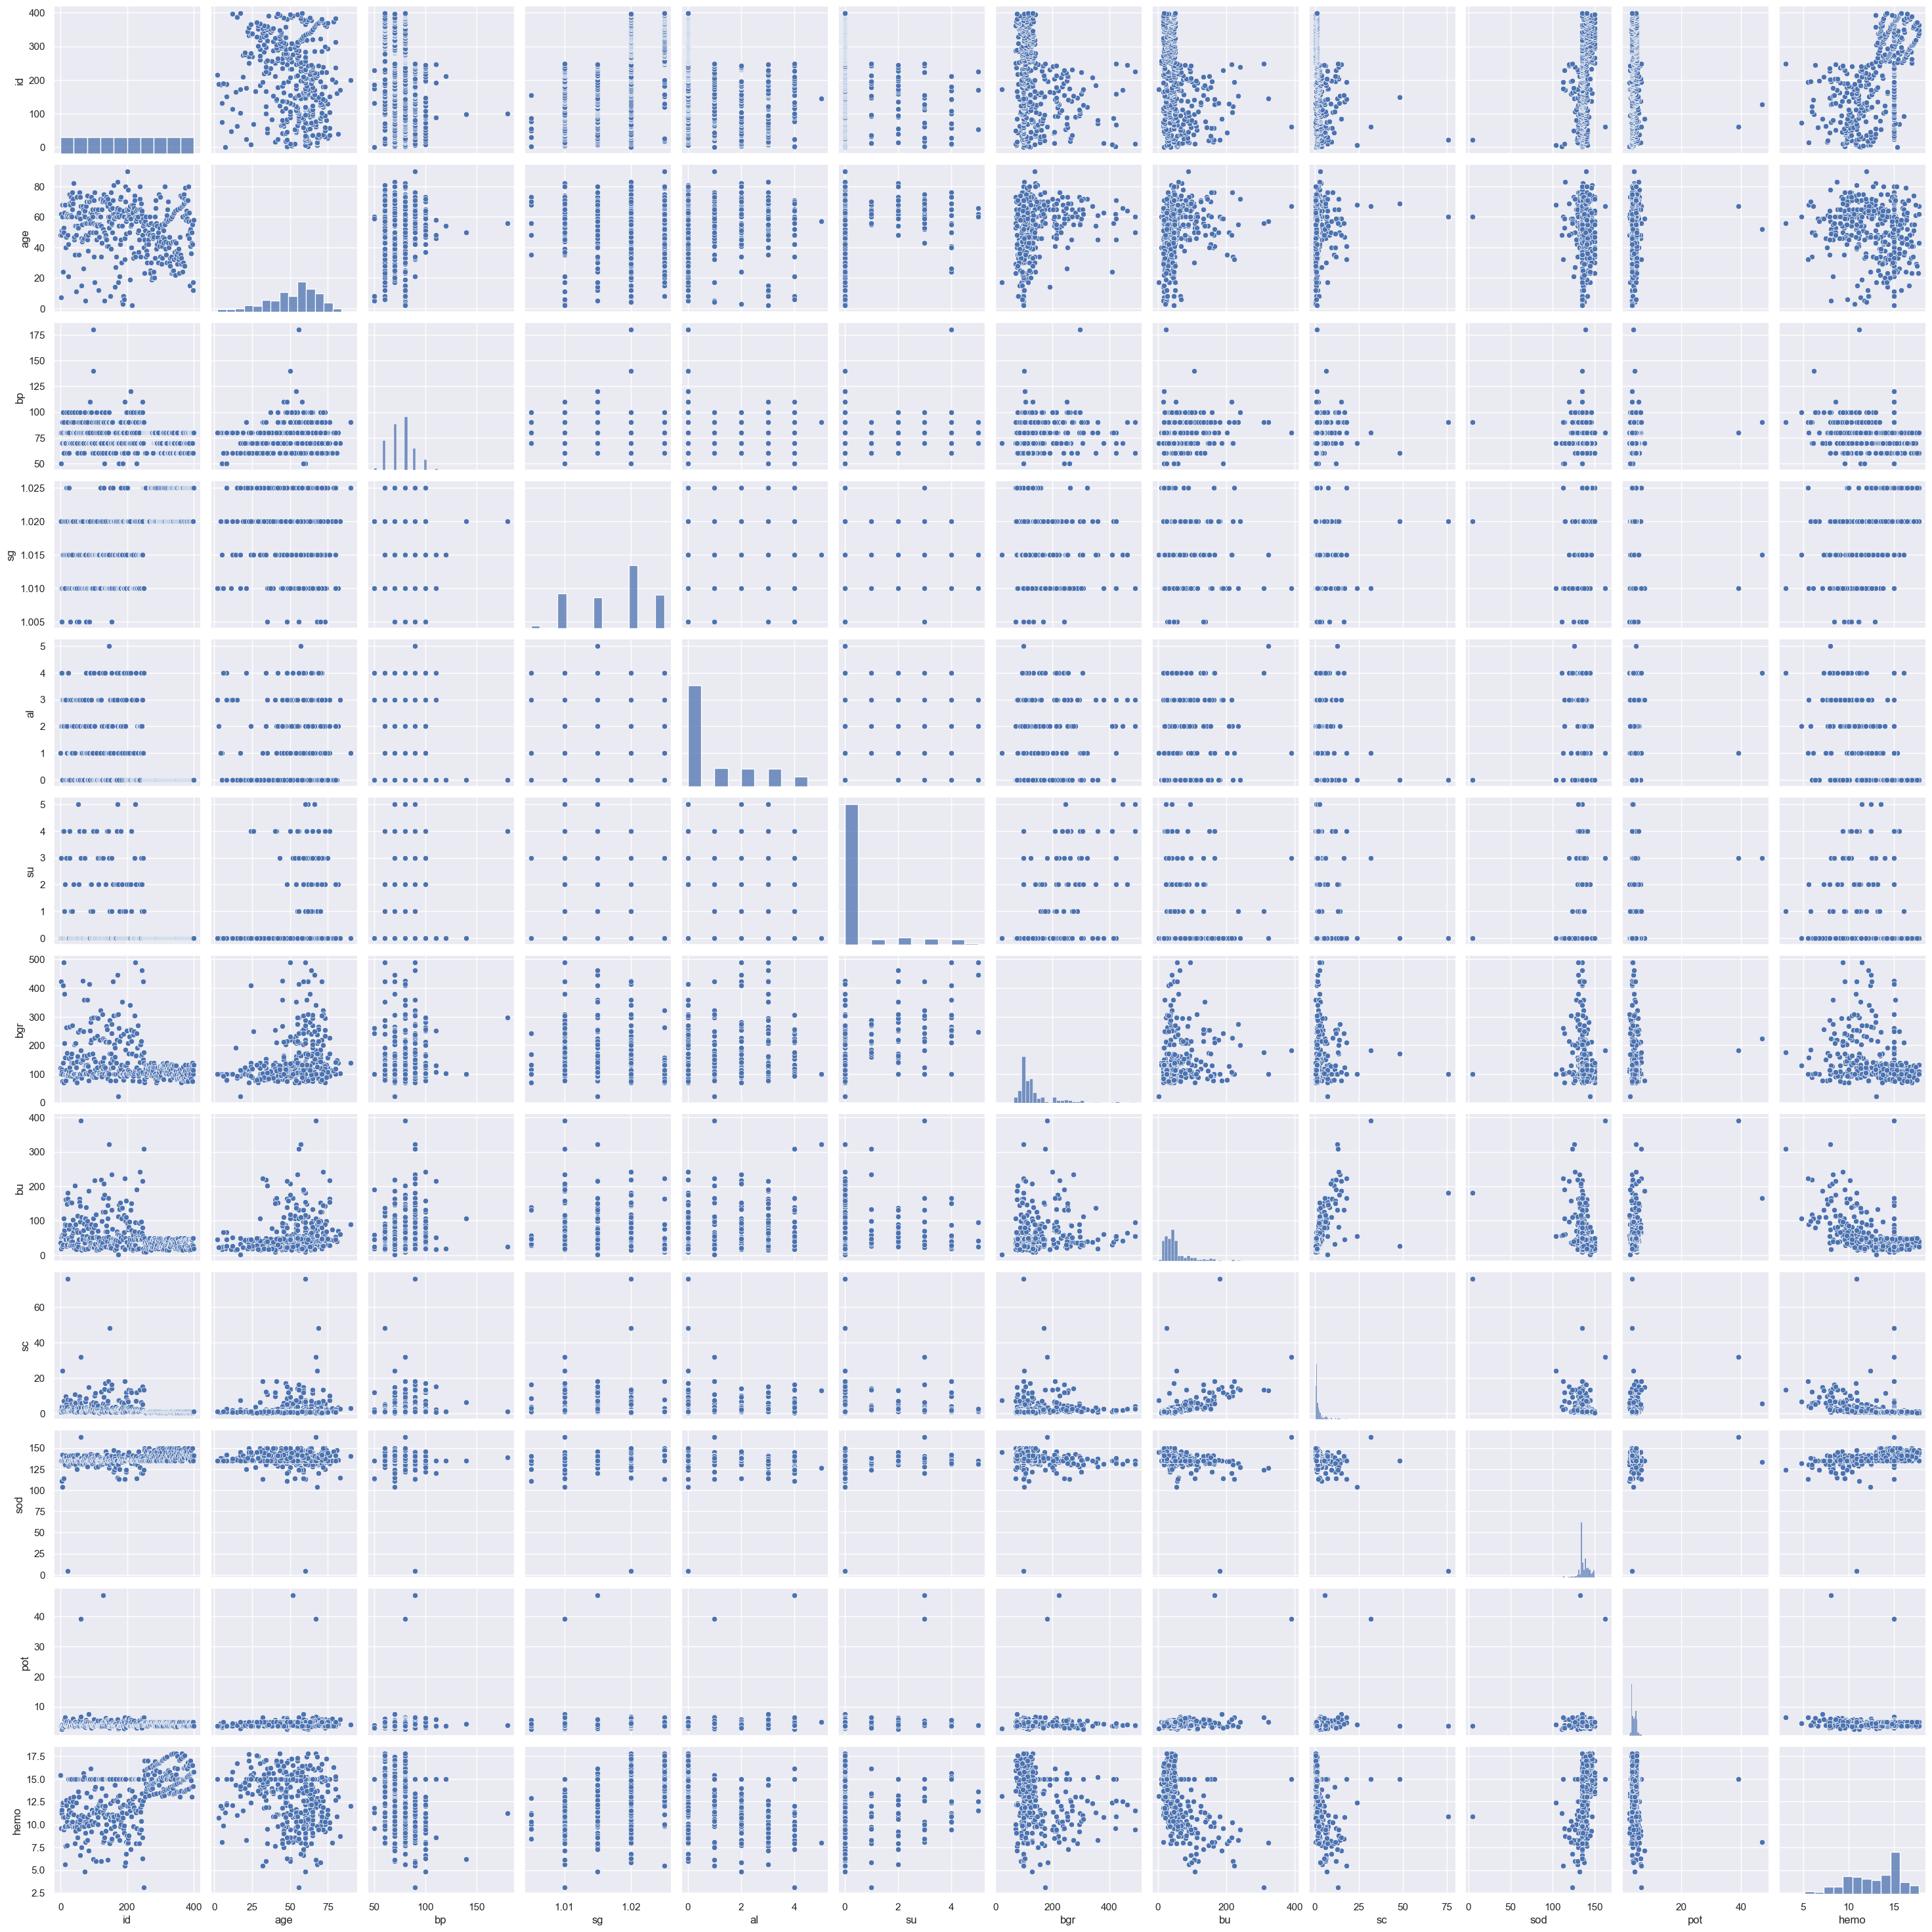

In [146]:
#we want to see what kind of distribution the datatype following and
# we need to see waht kind of code relation is present between the independent datatype

#creating pairlot
sns.pairplot(df_imputed)

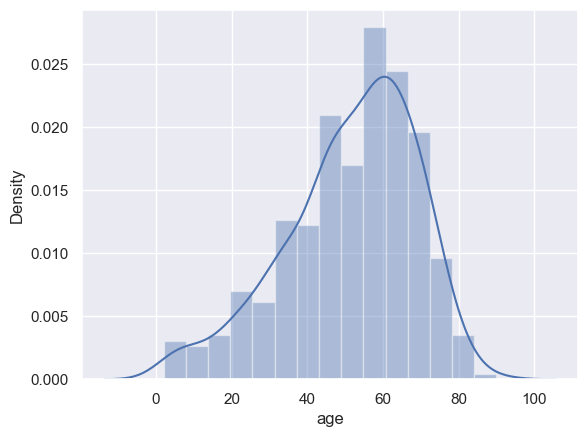

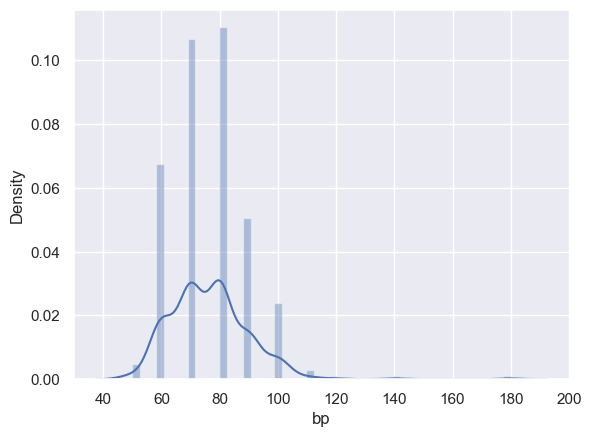

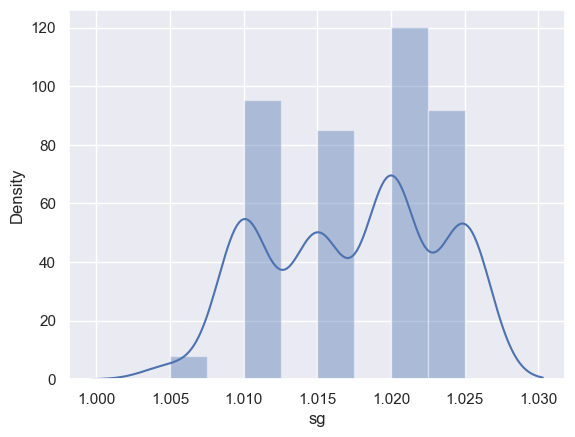

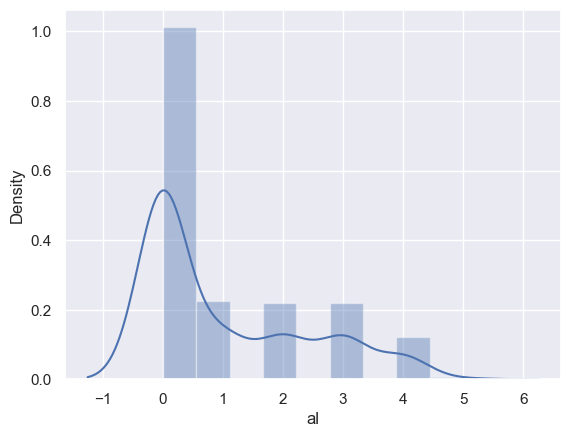

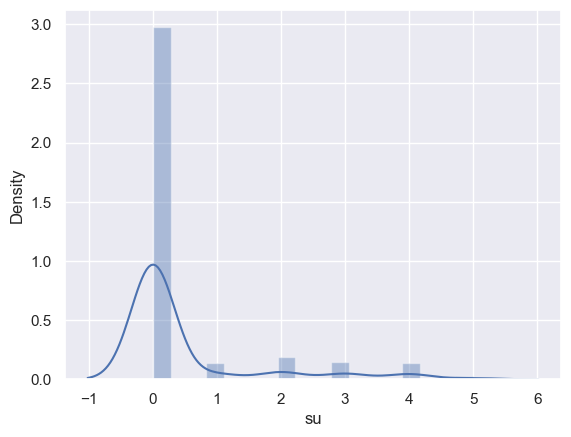

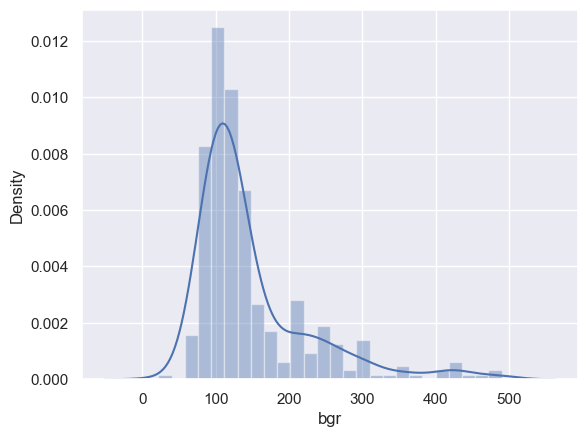

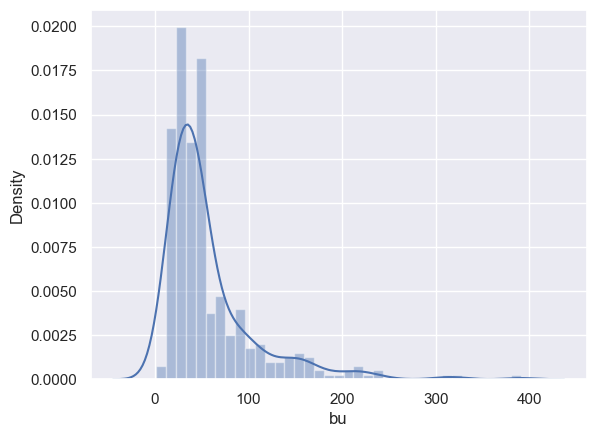

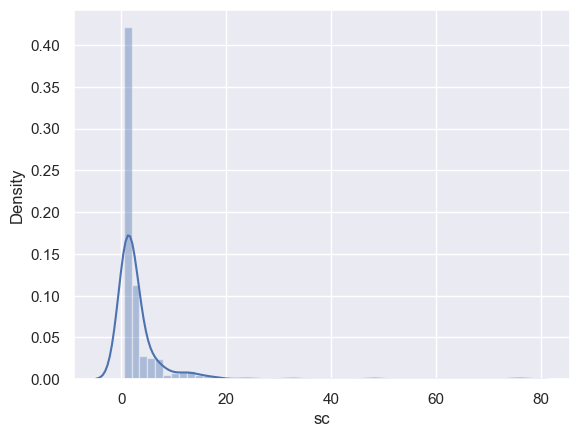

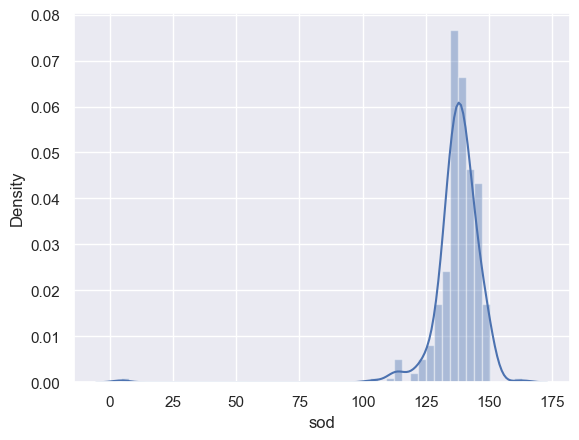

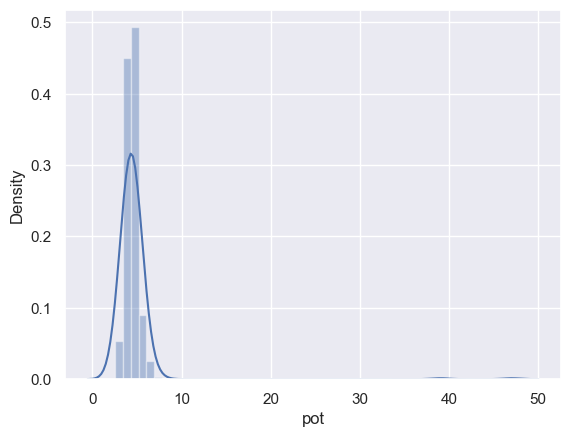

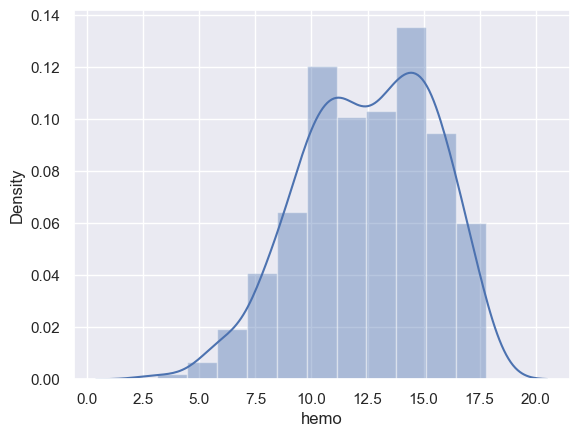

In [147]:
#find the distribution of data
#we want our data annomaly distribution

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)


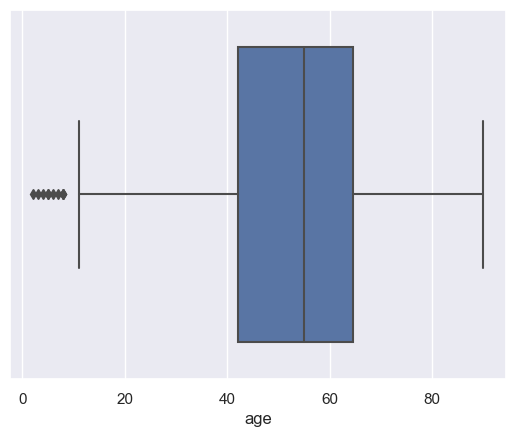

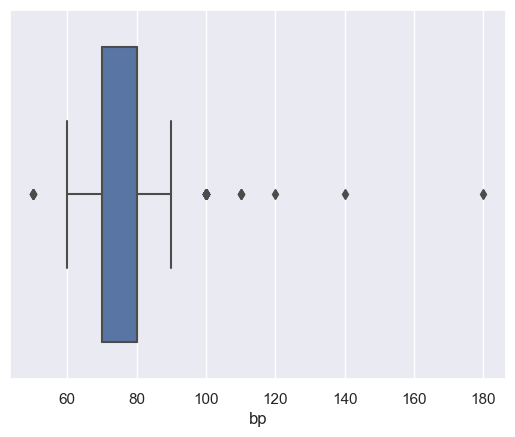

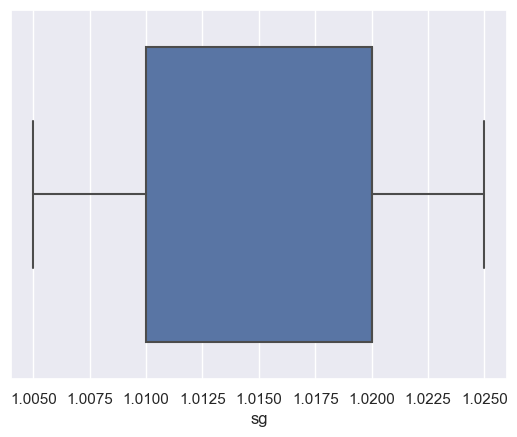

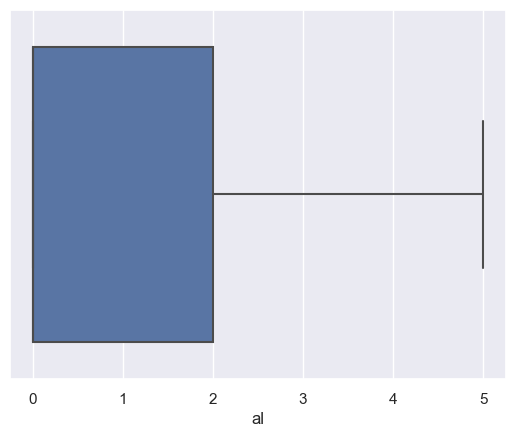

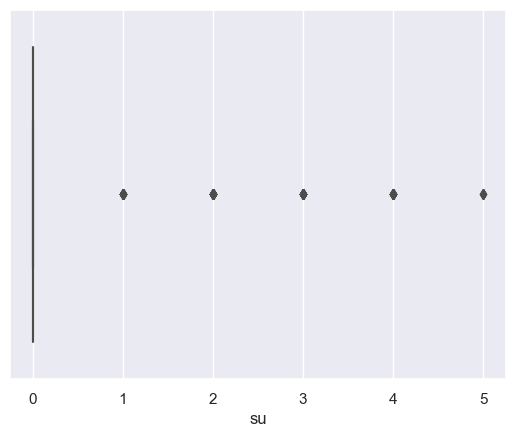

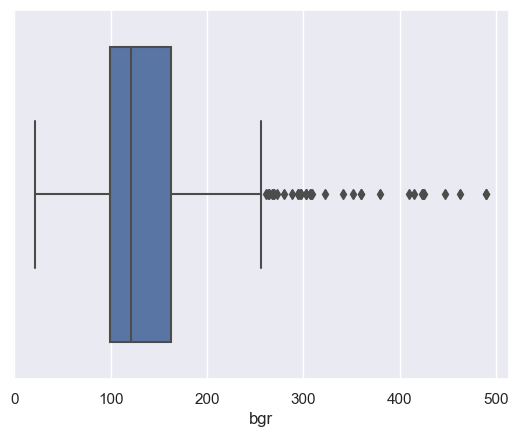

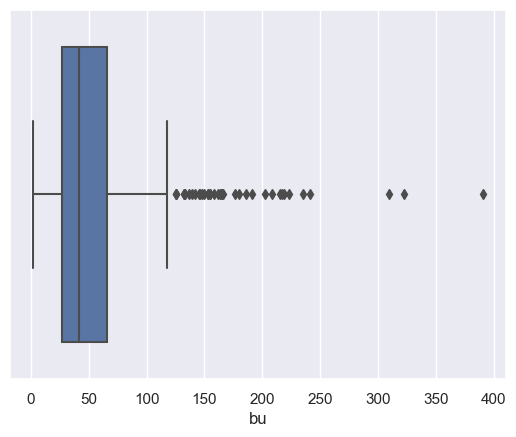

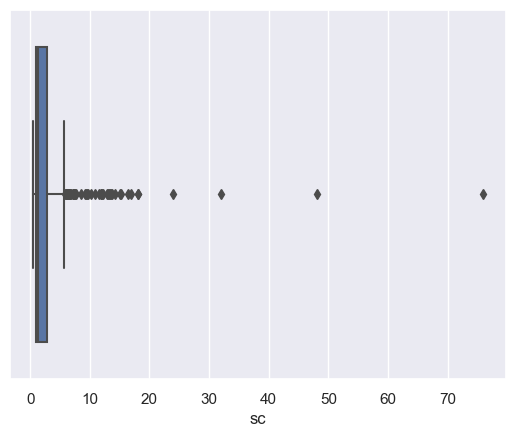

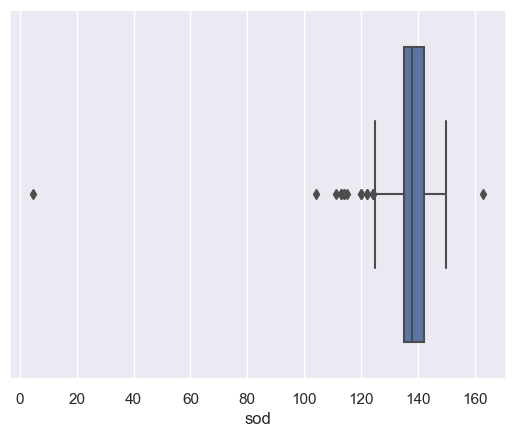

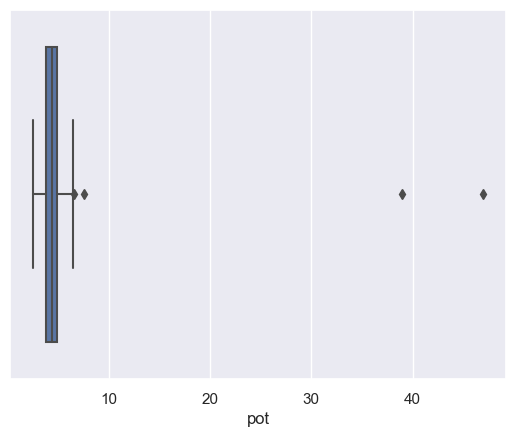

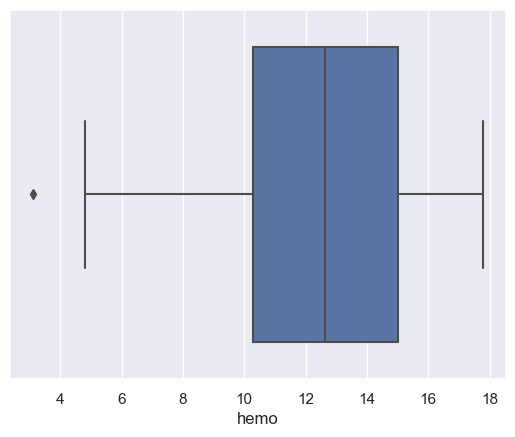

In [148]:
#find and remove outliers of data
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [149]:
#label encoding to categorical values to numerical
from sklearn import preprocessing 

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,1,0,0,0,0,1


In [150]:
df_enco.to_csv("kidney_Disease_pre-processed.csv")

<AxesSubplot:>

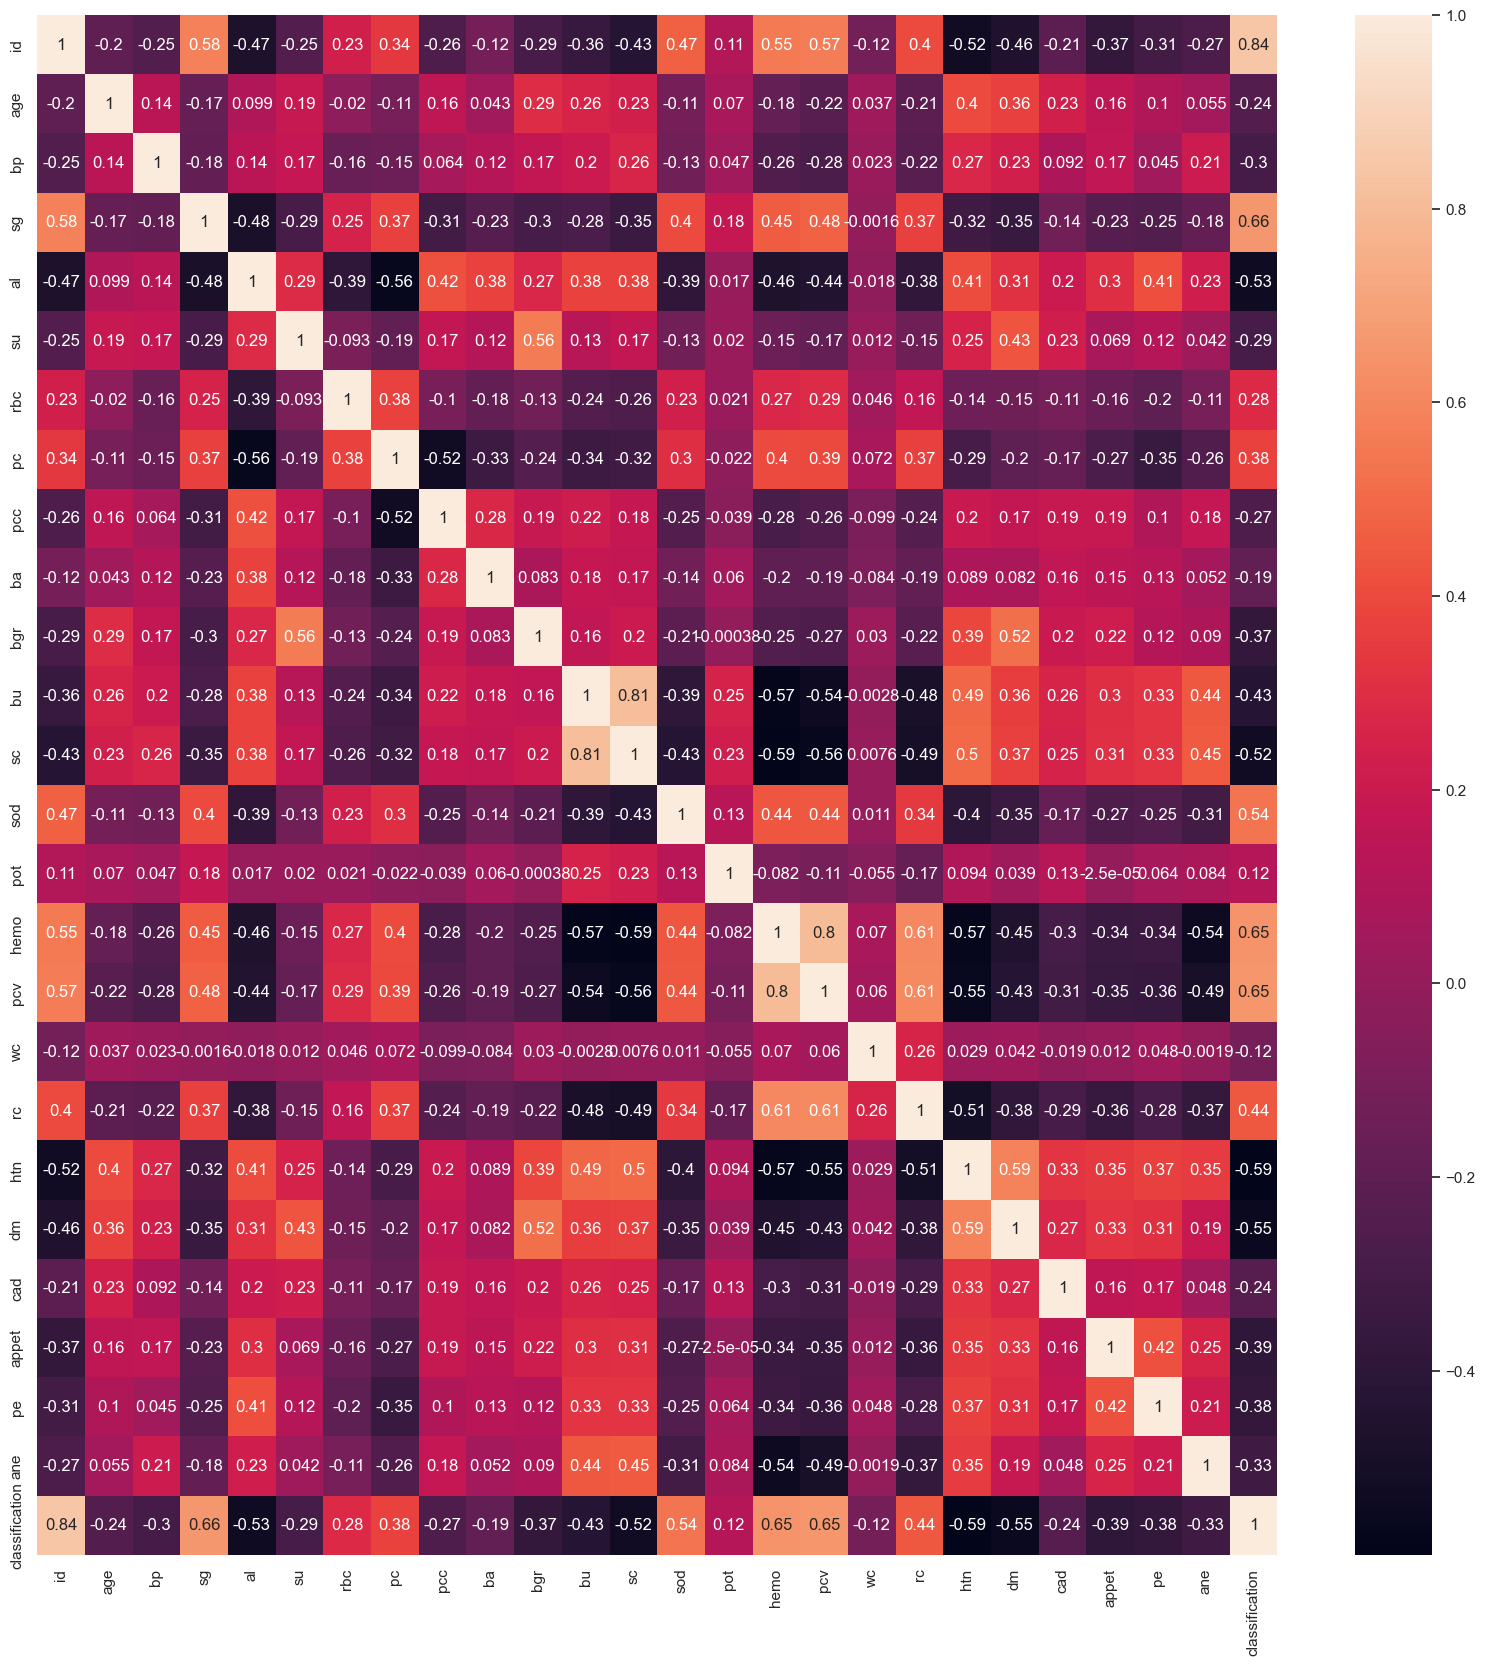

In [151]:
#finding correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [152]:
#lets make some final changes to data the data
#seperate independent and dependent variables and drop the ID column
#x= independent variables
#Y= dependent variables
x=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [153]:
#lets detect the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [154]:
#Lets balance the Labels
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [155]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them.
 #The MinMaxScaler transforms features by scaling them to a given range.
 #The fit_transform() method fits to the data and then transforms it. We don't need to scale the Labels.
 #Scale the features to between -1 and 1
 # Scaling is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance
 # between the data points is important.
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros


In [156]:
# Applying PCA
# The code below has .95 for the number of components parameter.
# It means that scikit-Learn choose the minimum number of principal components such that 95% of the variance is retained.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly. graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print (X_PCA.shape)
# Thus we need 18 columns to keep 95% of the variance


(500, 24)
(500, 18)


In [157]:
# with PCA
#NOW, spl it the detaset into training and testing sets keeping 20% of the data for testing.
#spl it the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)


In [158]:
import keras
# A Sequential model is appropriate for a plain stack of Layers where each Layer has exactly one input tensor and one output ten
from keras.models import Sequential
# Dense Layer is the regular deeply connected neural network Layer. It is most common and frequently used Layer. Dense Layer does
from keras.layers import Dense
# The Dropout Layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prever
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

from keras.optimizers import Adam
from sklearn.model_selection import KFold



In [159]:
# Creating the model
def model():

    Classifier = Sequential()
    Classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
    Classifier.add(Dropout (0.2))

    Classifier.add(Dense(15, activation = 'relu')) 
    Classifier.add(Dropout (0.4))
    Classifier.add(Dense(1, activation = 'sigmoid'))
    Classifier.compile(optimizer = 'adam' ,loss = 'binary_crossentropy',metrics =['accuracy'])
 

 

    return Classifier


In [160]:
x_train.shape


(400, 18)

In [161]:
x_train.shape[1]

18

In [162]:
model = model()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                285       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 15)                240       
                                                                 
 dropout_7 (Dropout)         (None, 15)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [163]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test),epochs = 6, verbose = 1)

Epoch 1/6
13/13 [==============================] - 2s 39ms/step - loss: 0.6626 - accuracy: 0.5400 - val_loss: 0.6314 - val_accuracy: 0.6600
Epoch 2/6
13/13 [==============================] - 0s 8ms/step - loss: 0.6240 - accuracy: 0.6450 - val_loss: 0.5950 - val_accuracy: 0.8900
Epoch 3/6
13/13 [==============================] - 0s 10ms/step - loss: 0.6025 - accuracy: 0.6850 - val_loss: 0.5576 - val_accuracy: 0.9600
Epoch 4/6
13/13 [==============================] - 0s 9ms/step - loss: 0.5604 - accuracy: 0.7675 - val_loss: 0.5225 - val_accuracy: 0.9700
Epoch 5/6
13/13 [==============================] - 0s 9ms/step - loss: 0.5267 - accuracy: 0.8275 - val_loss: 0.4881 - val_accuracy: 0.9800
Epoch 6/6
13/13 [==============================] - 0s 8ms/step - loss: 0.4917 - accuracy: 0.8550 - val_loss: 0.4555 - val_accuracy: 0.9900


In [164]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix
import matplotlib.pyplot as plt

def plot_auc(t_y, p_y):
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1,figsize=(9,9))
    c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' %('classification', auc(fpr, tpr)))
    c_ax.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1,figsize=(9,9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label='%s (Ap Score: %0.2f)' %('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)

    f.add_subplot(1,2,1)
    plt.plot(history.history['val_loss'], label='val loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.title("Model LOSS")

    f.add_subplot(1,2,2)
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Model accuracy")

    plt.show()


4/4 [==============================] - 0s 3ms/step


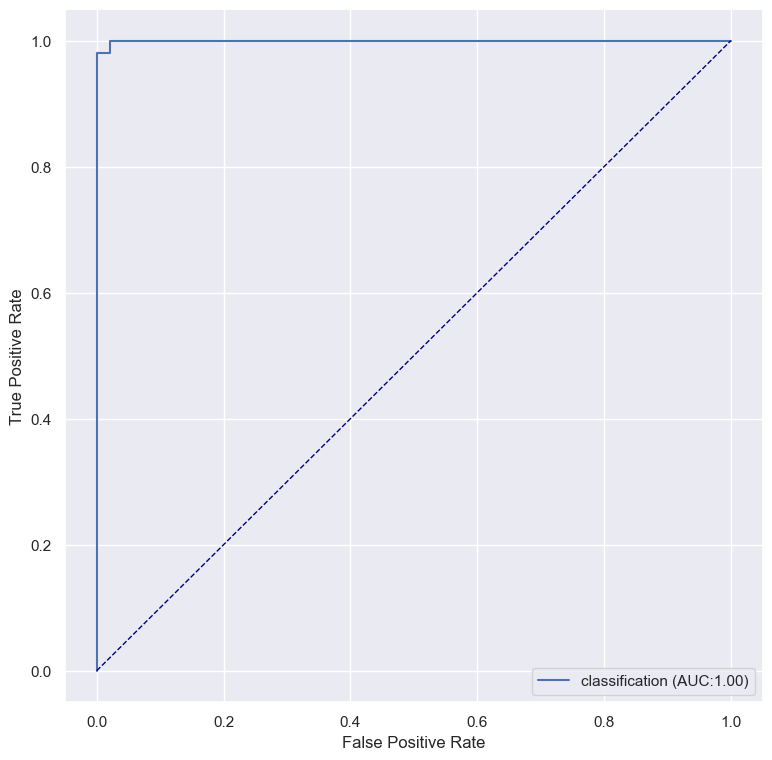

In [165]:
plot_auc(y_test, model.predict(x_test, verbose = True))

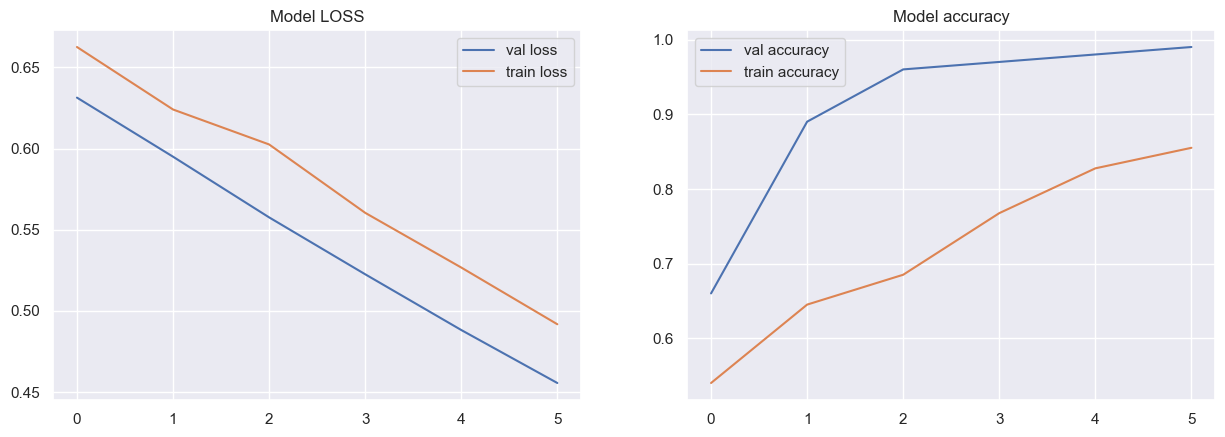

In [166]:
hist = plot_history(history)

4/4 [==============================] - 0s 3ms/step


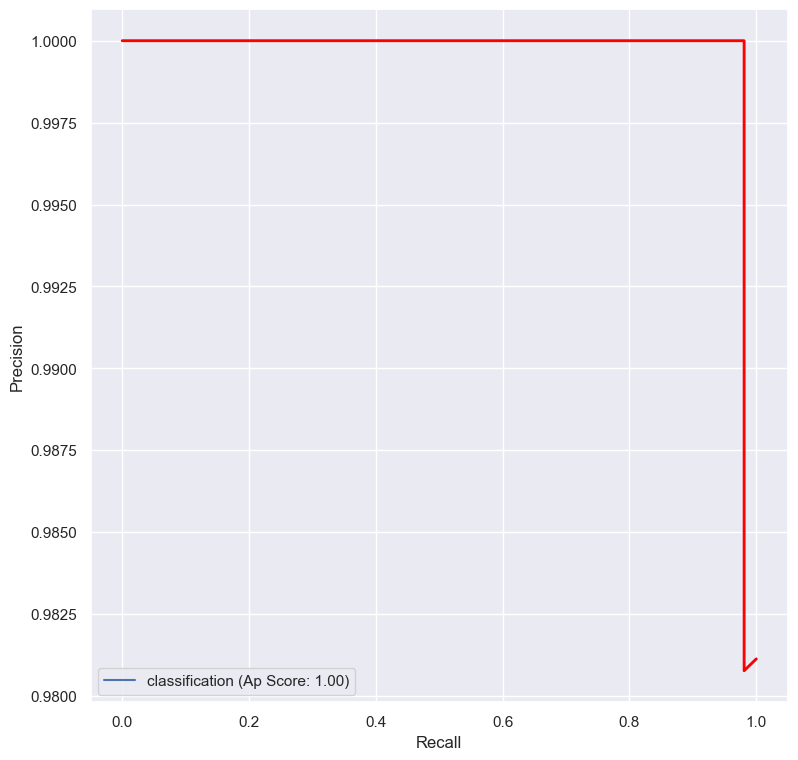

In [167]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test, verbose = True))

In [168]:
def calc_f1(prec, recall):
    return 2 * (prec * recall) / (prec + recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))
f1score = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]

idx = np.argmax(f1score)

threshold = thresholds[idx]

print('**********************************************')
print('Precision: ' + str(precision[idx]))
print('Recall: ' + str(recall[idx]))
print('Threshold: ' + str(threshold))
print('F1 score: ' + str(f1score[idx]))


4/4 [==============================] - 0s 3ms/step
**********************************************
Precision: 0.9811320754716981
Recall: 1.0
Threshold: 0.53672904
F1 score: 0.9904761904761905


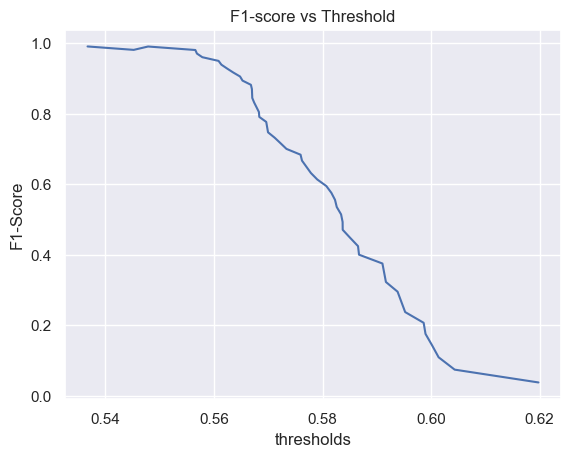

In [169]:
plt.figure()
plt.plot(thresholds,f1score)
plt.title("F1-score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1-Score")
plt.show()